In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv("SalesData.csv")

In [4]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [5]:
sales.columns

Index(['AccountId', 'AccountName', 'Region', 'Division', 'City', 'State',
       'Tier', 'Month', 'Sales2015', 'Sales2016', 'Units2015', 'Units2016',
       'TargetAchevied2015', 'TargetAchevied2016'],
      dtype='object')

# 1. Compare Sales by region for 2016 with 2015 using bar chart

In [6]:
region_sales = sales.groupby("Region")[["Sales2015","Sales2016"]].sum()

In [7]:
region_sales

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


<Figure size 1200x600 with 0 Axes>

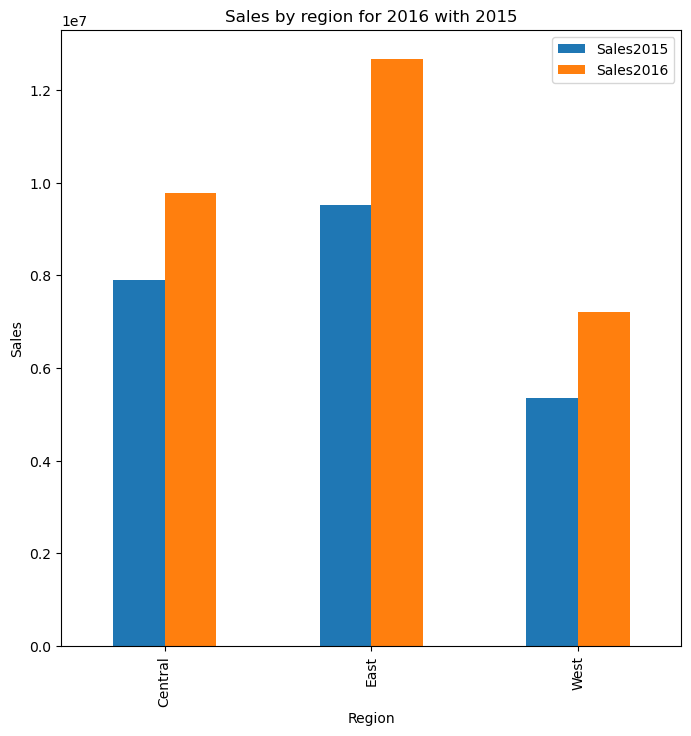

We can conclude that sales in 2016 is more as compared to sales in 2015 in all regions. East region has contributed the maximum.


In [9]:
plt.figure(figsize=(12,6))
region_sales.plot(kind="bar",figsize=(8,8))
plt.ylabel('Sales')
plt.title("Sales by region for 2016 with 2015")
plt.show()
print("We can conclude that sales in 2016 is more as compared to sales in 2015 in all regions. East region has contributed the maximum.")

# 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [10]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [11]:
sales_pie = sales.groupby("Region")["Sales2016"].sum()

In [12]:
sales_pie

Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64

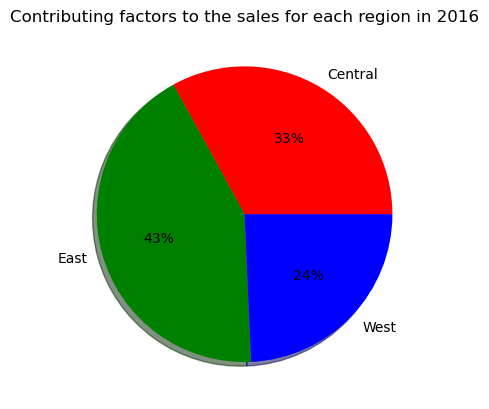

In [22]:
plt.pie(sales_pie,autopct="%1.0f%%",labels=["Central","East","West"],shadow=True,colors=['r', 'g', 'b'])
plt.title("Contributing factors to the sales for each region in 2016")
plt.show()

In [23]:
print("East region has contributed the maximum in 2016.")

East region has contributed the maximum in 2016.


# 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [42]:
Region_tier_sales = sales[["Region", "Tier", "Sales2015", "Sales2016"]].pivot_table(index = "Region", columns = "Tier", values=["Sales2015","Sales2016"])
Region_tier_sales.head()

Sales2015                                            Sales2016  \
Tier            High          Low          Med          Out          High   
Region                                                                      
Central  6519.970693  3430.689709  5926.148610  5811.777857   8187.558342   
East     8224.994771  5094.157062  6041.559951  4663.318750  10535.244070   
West     5819.741621  3531.917789  5747.411104  3853.770000   7446.716107   

                                               
Tier             Low          Med         Out  
Region                                         
Central  4119.392182  7542.067253 -232.037857  
East     6468.528757  9059.045868    0.000000  
West     5786.853579  7833.273900    0.000000

<Axes: title={'center': 'Sales of 2015 & 2016 with Region and Tiers'}, xlabel='Region', ylabel='Sales'>

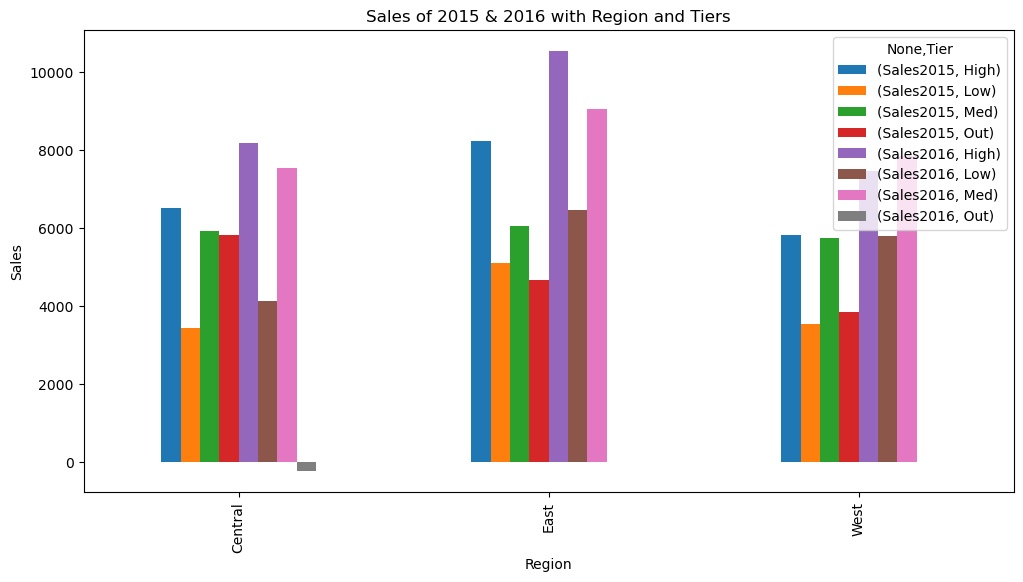

In [43]:
Region_tier_sales.plot.bar(figsize = (12,6), ylabel = "Sales", title = "Sales of 2015 & 2016 with Region and Tiers")


In [17]:
print("We can conclude that East region and High tier in 2016 have contributed the maximum. Also sales in 2015 and sales in 2016 both is maximum in East region and High tier")

We can conclude that East region and High tier in 2016 have contributed the maximum. Also sales in 2015 and sales in 2016 both is maximum in East region and High tier


# 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [44]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [45]:
#grouping the data based on Region and State to find the total sales in 2015 and 2016
sales_state = sales.groupby(['Region',"State"])[['Sales2015','Sales2016']].sum()

In [46]:
sales_state

Sales2015     Sales2016
Region  State                            
Central AL     5.091037e+05  5.958284e+05
        AR     2.133175e+05  2.276081e+05
        IL     6.217938e+05  7.843073e+05
        IN     3.166781e+05  5.996723e+05
        KY     5.312149e+05  6.332189e+05
        LA     4.793662e+05  6.803033e+05
        MI     5.686517e+05  7.072480e+05
        MS     3.045782e+05  2.204109e+05
        OH     9.276875e+05  1.221085e+06
        OK     2.484607e+05  3.396445e+05
        PA     3.002670e+05  2.877924e+05
        TN     4.370386e+05  5.522301e+05
        TX     1.712440e+06  2.013116e+06
        WI     3.044250e+05  4.403802e+05
        WV     4.167062e+05  4.849640e+05
East    CT     1.972028e+05  3.235023e+05
        DC     2.167240e+05  2.574217e+05
        FL     1.660162e+06  2.508232e+06
        GA     6.815465e+05  9.469198e+05
        MA     4.192788e+05  6.870964e+05
        MD     5.273091e+05  7.500088e+05
        ME     7.742564e+04  1.836730e+05
        NC     1.292802e+06  1.610521e+06
        NH     1.364194e+05  1.447175e+05
        NJ     5.204193e+05  7.822892e+05
        NY     1.725415e+06  1.703136e+06
        PA     7.850928e+05  8.943195e+05
        RI     1.563118e+05  1.624546e+05
        SC     2.478118e+05  4.634141e+05
        TN     4.967700e+04  7.010941e+04
        VA     8.193191e+05  1.179415e+06
West    AZ     3.889876e+05  5.195079e+05
        CA     1.891621e+06  2.396883e+06
        CO     4.023385e+05  5.046537e+05
        IA     1.022714e+05  1.461604e+05
        ID     9.237388e+04  1.157684e+05
        IL     9.375350e+04  1.224796e+05
        KS     2.284577e+05  2.850208e+05
        MN     3.142297e+05  3.220523e+05
        MO     4.444618e+05  7.241663e+05
        NE     6.981622e+04  8.587284e+04
        NM     8.828041e+04  1.325122e+05
        NV     2.057940e+05  2.814234e+05
        OR     2.629237e+05  4.383578e+05
        SD     7.549041e+04  1.662565e+05
        TX     2.530734e+05  3.495791e+05
        UT     1.133622e+05  1.732097e+05
        WA     3.225094e+05  4.457855e+05

In [47]:
#filtering out sales for East region in 2015 and 2016 
sales_east = sales_state.loc["East"]

In [48]:
sales_east

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


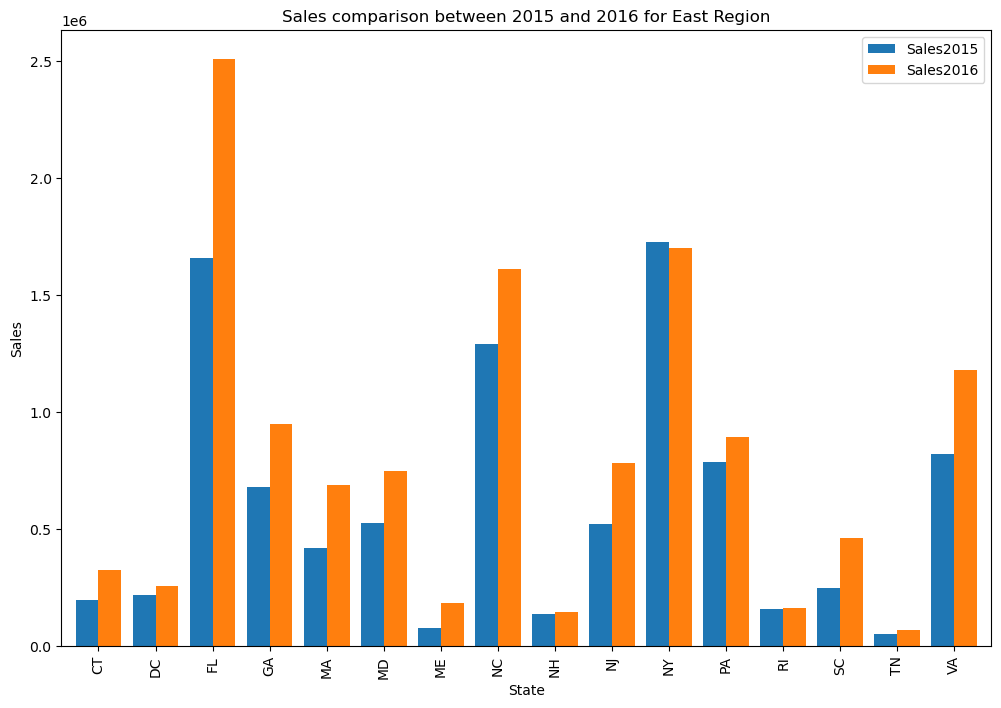

NY state registered a decline in sales in 2016 as compared to 2015


In [50]:
sales_east.plot(kind="bar",figsize=(12,8),width=0.8)
plt.ylabel("Sales")
plt.title("Sales comparison between 2015 and 2016 for East Region")
plt.show()
print("NY state registered a decline in sales in 2016 as compared to 2015")

# 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [51]:
sales.head(3)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29


In [52]:
#grouping the data based on tier and division to find the total sum of sales in 2015 and 2016
sales_division_tier =sales.groupby(["Tier","Division"])[["Units2015","Units2016"]].sum()

In [53]:
sales_division_tier

Units2015  Units2016
Tier Division                           
High BIG APPLE       180.8330   231.0000
     CHARGERS        123.6666   164.4999
     CONGRESSIONAL   164.5003   205.0000
     DIAMONDBACK     153.3334   176.6667
     EMPIRE          414.3332   449.3332
...                       ...        ...
Out  SYNERGY           3.0000     0.0000
     THE CAROLINAS     2.0000     0.0000
     VICTORY           1.0000     0.0000
     WOLVERINE         1.0000     0.0000
     WRANGLER         13.0000     0.0000

[96 rows x 2 columns]

In [54]:
high_tier = sales_division_tier.loc["High"]
high_tier

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


<Axes: xlabel='Division'>

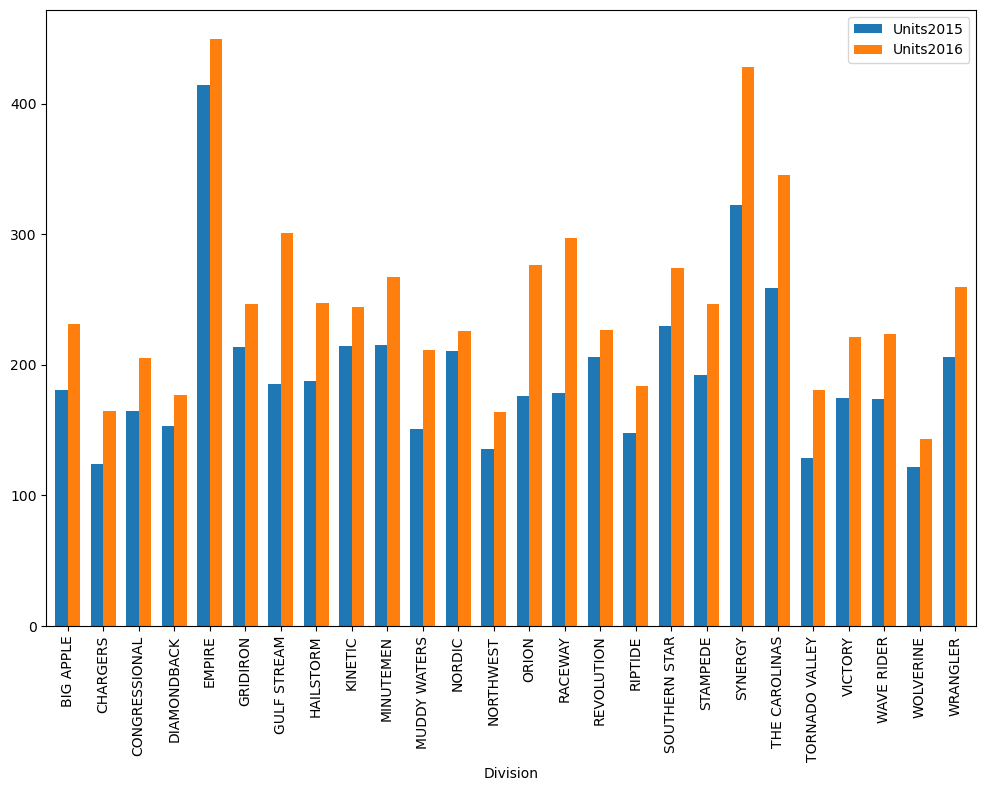

In [55]:
high_tier.plot(kind="bar",figsize=(12,8),width=0.7)

In [56]:
print("No division show decline in number of units sold in 2016 compared to 2015")

No division show decline in number of units sold in 2016 compared to 2015


# 6. Create a new column Qtr in the imported dataset. The Quarters are based on months and defined as -


### • Jan - Mar : Q1
### • Apr - Jun : Q2
### • Jul - Sep : Q3
### • Oct - Dec : Q4

In [57]:
sales["Qtr"]=np.where((sales.Month=="Jan")|(sales.Month=="Feb")|(sales.Month=="Mar"),"Q1",
             np.where((sales.Month=="Apr")|(sales.Month=="May")|(sales.Month=="Jun"),"Q2",
             np.where((sales.Month=="Jul")|(sales.Month=="Aug")|(sales.Month=="Sep"),"Q3",
                                        "Q4")))
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


# 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [58]:
#grouping data based on "Qtr" to find total sales in 2015 and 2016
qtr_sales = sales.groupby("Qtr")[["Sales2015","Sales2016"]].sum()
qtr_sales

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


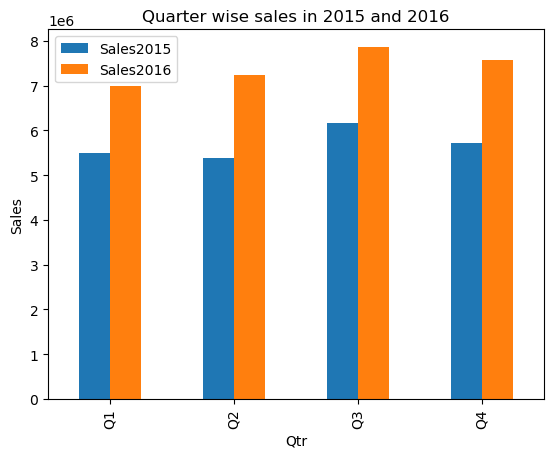

In [59]:
qtr_sales.plot(kind="bar")
plt.ylabel("Sales")
plt.title("Quarter wise sales in 2015 and 2016")
plt.show()

# 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [60]:
sales["Sales2016"]=np.where(sales.Sales2016<0,sales.Sales2016.mean(),sales["Sales2016"])
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


In [61]:
sales_pie_2016=pd.pivot_table(data=sales,index="Tier",columns="Qtr",values="Sales2016",aggfunc='sum')
sales_pie_2016

Qtr,Q1,Q2,Q3,Q4
Tier,,,,
High,3.963147e+06,4.150526e+06,4.883454e+06,4.760945e+06
Low,9.590398e+05,9.199262e+05,8.053847e+05,7.606046e+05
Med,2.191561e+06,2.234721e+06,2.197058e+06,2.124103e+06
Out,0.000000e+00,0.000000e+00,7.998040e+03,0.000000e+00


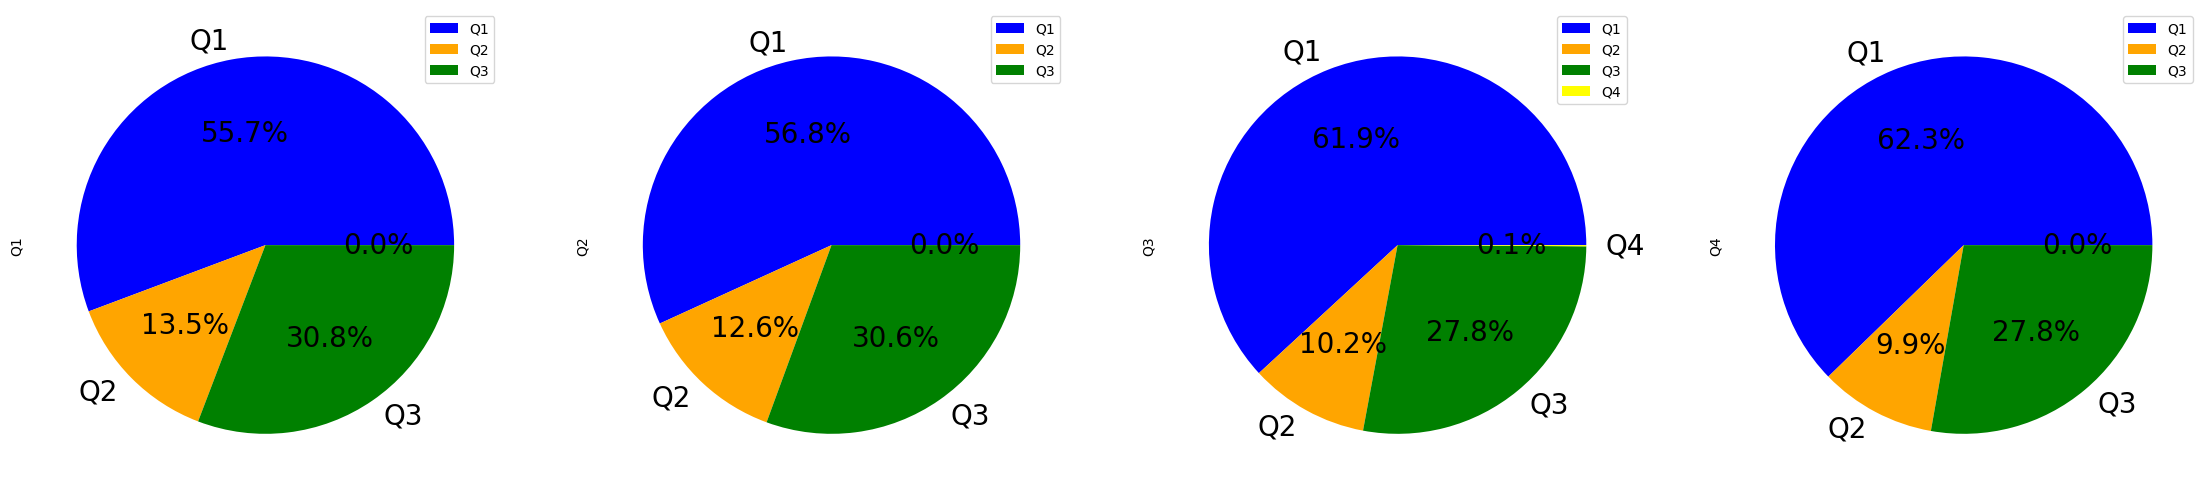

In [69]:
sales_pie_2016.plot(kind="pie",labels=["Q1","Q2","Q3","Q4"],colors=['blue', 'orange', 'green','yellow'],
                    autopct='%.1f%%',fontsize=20,subplots=True,
                    figsize=(28,10))


plt.show()